In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

№2

In [3]:
ccpp_df = pd.read_excel('CCPP.xlsx')

In [4]:
ccpp_df

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74


In [5]:
ccpp_train_val, ccpp_test = train_test_split(ccpp_df, test_size=0.1)
ccpp_train, ccpp_val = train_test_split(ccpp_train_val, test_size=0.1)

In [6]:
ccpp_train_val.shape

(8611, 5)

In [7]:
ccpp_test.shape

(957, 5)

In [8]:
ccpp_train.shape

(7749, 5)

In [9]:
ccpp_val.shape

(862, 5)

In [10]:
lin_reg = LinearRegression()
X_train = ccpp_train.drop('PE',axis=1)
y_train = ccpp_train['PE']
X_val = ccpp_val.drop('PE',axis=1)
y_val = ccpp_val['PE']

In [11]:
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
predictions_array = lin_reg.predict(X_val)

In [13]:
r2_score(y_val, predictions_array)

0.9359618658073707

In [14]:
mean_squared_error(y_val, predictions_array)

19.171351781637842

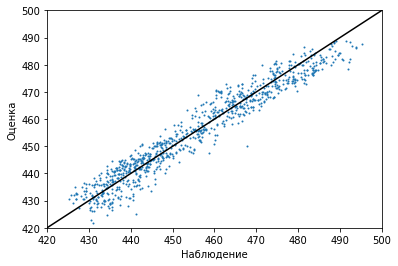

In [15]:
plt.gca().set(xlim = (420, 500),ylim = (420, 500), xlabel='Наблюдение', ylabel='Оценка')
plt.scatter(y_val, predictions_array, s = 1)
plt.plot(np.linspace(420,500),np.linspace(420,500), c = 'black')

№1

In [2]:
davis_df = pd.read_csv('Davis.csv')

In [3]:
davis_df

,Unnamed: 0,sex,weight,height,repwt,repht
0,1,M,77,182,77.0,180.0
1,2,F,58,161,51.0,159.0
2,3,F,53,161,54.0,158.0
3,4,M,68,177,70.0,175.0
4,5,F,59,157,59.0,155.0
...,...,...,...,...,...,...
195,196,M,74,175,71.0,175.0
196,197,M,83,180,80.0,180.0
197,198,M,81,175,NaN,NaN
198,199,M,90,181,91.0,178.0


In [4]:
davis_df = davis_df.drop('Unnamed: 0',axis=1)
davis_df = davis_df.loc[davis_df['weight'] > 30]
davis_df = davis_df.loc[davis_df['height'] > 130]
davis_df = pd.get_dummies(davis_df, columns=['sex'])
davis_df = davis_df.rename(columns={'sex_F': 'sex'})
davis_df = davis_df.drop('sex_M',axis=1)

1 - Female, 0 - Male

In [5]:
davis_df

,weight,height,repwt,repht,sex
0,77,182,77.0,180.0,0
1,58,161,51.0,159.0,1
2,53,161,54.0,158.0,1
3,68,177,70.0,175.0,0
4,59,157,59.0,155.0,1
...,...,...,...,...,...
195,74,175,71.0,175.0,0
196,83,180,80.0,180.0,0
197,81,175,NaN,NaN,0
198,90,181,91.0,178.0,0


In [6]:
davis_train_val, davis_test = train_test_split(davis_df, test_size = 50, stratify = davis_df['sex'])
davis_train, davis_val = train_test_split(davis_train_val, test_size=0.1)

In [7]:
davis_test

,weight,height,repwt,repht,sex
51,56,165,57.0,163.0,1
190,88,185,93.0,188.0,0
29,101,183,100.0,180.0,0
199,79,177,81.0,178.0,0
165,59,159,59.0,155.0,1
167,66,166,66.0,165.0,1
98,52,159,52.0,153.0,1
99,55,155,NaN,154.0,1
131,87,185,89.0,185.0,0
0,77,182,77.0,180.0,0


(array([ 6., 14., 28., 24., 15., 25., 13.,  7.,  1.,  1.]),
 array([153. , 157.4, 161.8, 166.2, 170.6, 175. , 179.4, 183.8, 188.2,
        192.6, 197. ]),
 <a list of 10 Patch objects>)

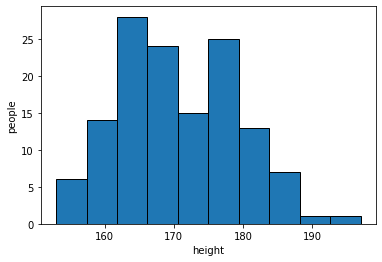

In [8]:
plt.gca().set(xlabel='height', ylabel='people')
plt.hist(davis_train['height'], bins = 10, edgecolor = 'black')

(array([ 5., 27., 34., 32., 15., 14.,  5.,  1.,  0.,  1.]),
 array([ 39.,  47.,  55.,  63.,  71.,  79.,  87.,  95., 103., 111., 119.]),
 <a list of 10 Patch objects>)

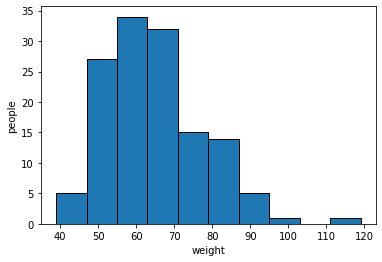

In [9]:
plt.gca().set(xlabel='weight', ylabel='people')
plt.hist(davis_train['weight'], bins = 10, edgecolor = 'black')

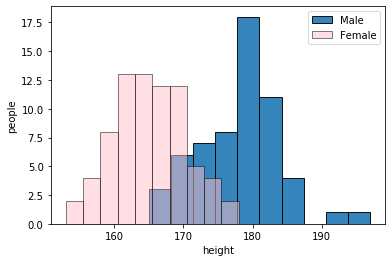

In [10]:
plt.gca().set(xlabel='height', ylabel='people')
plt.hist(davis_train[davis_train['sex'] == 0]['height'], bins=10, edgecolor = 'black',  alpha = 0.9,  label ='Male')
plt.hist(davis_train[davis_train['sex'] == 1]['height'], bins=10, edgecolor = 'black', color = 'pink',  alpha = 0.5, label ='Female')
plt.legend()

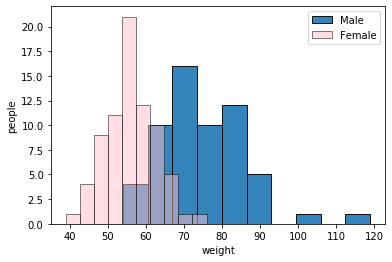

In [11]:
plt.gca().set(xlabel='weight', ylabel='people')
plt.hist(davis_train[davis_train['sex'] == 0]['weight'], bins=10, edgecolor = 'black',  alpha = 0.9,  label ='Male')
plt.hist(davis_train[davis_train['sex'] == 1]['weight'], bins=10, edgecolor = 'black', color = 'pink',  alpha = 0.5, label ='Female')
plt.legend()

In [12]:
log_reg = LogisticRegression()
qd_a = QuadraticDiscriminantAnalysis()

In [13]:
X_train = davis_train[['height','weight']]
y_train = davis_train['sex']
X_test = davis_test[['height','weight']]
y_test = davis_test['sex']

In [14]:
log_reg.fit(X_train,y_train)
qd_a.fit(X_train,y_train)

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)

In [15]:
log_pr_test = log_reg.predict(X_test)
qda_pr_test = qd_a.predict(X_test)
log_pr_train = log_reg.predict(X_train)
qda_pr_train = qd_a.predict(X_train)

In [16]:
accuracy_score(log_pr_test, y_test)

0.9

In [17]:
accuracy_score(qda_pr_test, y_test)

0.86

In [18]:
accuracy_score(log_pr_train, y_train)

0.9104477611940298

In [19]:
accuracy_score(qda_pr_train, y_train)

0.8880597014925373

In [20]:
class_cmap = ListedColormap(['blue', 'pink'])

In [21]:
x1_min_train, x1_max_train = X_train['height'].min()-0.5, X_train['height'].max()+0.5
x2_min_train, x2_max_train = X_train['weight'].min()-0.5, X_train['weight'].max()+0.5

In [22]:
xx1_train,xx2_train = np.mgrid[x1_min_train:x1_max_train:50j, x2_min_train:x2_max_train:50j]

In [23]:
X_pred_train = np.column_stack([xx1_train.reshape(-1), xx2_train.reshape(-1)])

Для логистической регрессии

In [24]:
y_pred_train_lr = log_reg.predict(X_pred_train)

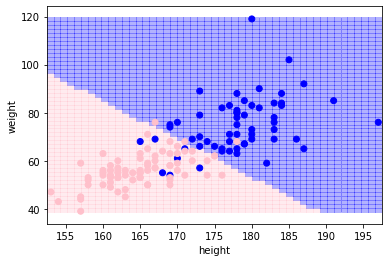

In [25]:
plt.pcolormesh(xx1_train,xx2_train, y_pred_train_lr.reshape(xx1_train.shape), cmap=class_cmap, alpha=0.3, shading='auto')
plt.gca().set(xlabel='height', ylabel='weight')
plt.scatter(X_train['height'], X_train['weight'], c=y_train, cmap=class_cmap)
plt.show()

Для квадратичного дискриминантонго анализа

In [26]:
y_pred_train_qda = qd_a.predict(X_pred_train)

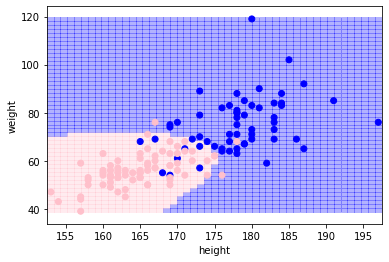

In [27]:
plt.pcolormesh(xx1_train,xx2_train, y_pred_train_qda.reshape(xx1_train.shape), cmap=class_cmap, alpha=0.3, shading='auto')
plt.gca().set(xlabel='height', ylabel='weight')
plt.scatter(X_train['height'], X_train['weight'], c=y_train, cmap=class_cmap)
plt.show()

In [28]:
x1_min_test, x1_max_test = X_test['height'].min()-0.5, X_test['height'].max()+0.5
x2_min_test, x2_max_test = X_test['weight'].min()-0.5, X_test['weight'].max()+0.5

In [29]:
xx1_test,xx2_test = np.mgrid[x1_min_test:x1_max_test:50j, x2_min_test:x2_max_test:50j]

In [30]:
X_pred_test = np.column_stack([xx1_test.reshape(-1), xx2_test.reshape(-1)])

Для логистической регрессии

In [31]:
y_pred_test_lr = log_reg.predict(X_pred_test)

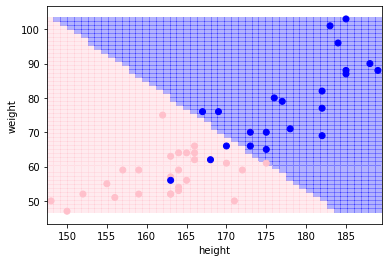

In [32]:
plt.pcolormesh(xx1_test,xx2_test, y_pred_test_lr.reshape(xx1_test.shape), cmap=class_cmap, alpha=0.3, shading='auto')
plt.gca().set(xlabel='height', ylabel='weight')
plt.scatter(X_test['height'], X_test['weight'], c=y_test, cmap=class_cmap)
plt.show()

Для квадратичного дискриминантонго анализа

In [33]:
y_pred_test_qda = qd_a.predict(X_pred_test)

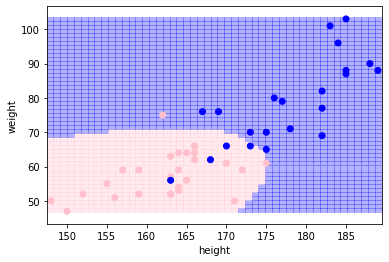

In [34]:
plt.pcolormesh(xx1_test,xx2_test, y_pred_test_qda.reshape(xx1_test.shape), cmap=class_cmap, alpha=0.3, shading='auto')
plt.gca().set(xlabel='height', ylabel='weight')
plt.scatter(X_test['height'], X_test['weight'], c=y_test, cmap=class_cmap)
plt.show()